#### Author: Assaf Attias

# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

Notes: Avoid loops where possible.

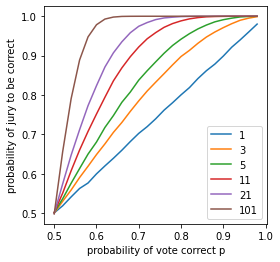

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame

# init
n_jury = [1, 3, 5, 11, 21, 101]
probs = np.arange(start=0.5, stop=1, step=0.02)
n_simulations = 100000
n_list = []
p_list = []
jury_p_list = []

# Monte-Carlo Simulation
for n in n_jury:
    for p in probs:
        jury_votes = np.random.uniform(low=0, high=1, size=(n, n_simulations)) # random votes for each juror in all simulations
        juror_correct_votes_count = np.count_nonzero(jury_votes < p,axis=0) # count the number of correct juror in each simulation
        jury_correct_votes = np.count_nonzero(juror_correct_votes_count > (n / 2)) # count the number of correct jury simulations (more than half correct votes in simulation)
        # add result
        n_list.append(n)
        p_list.append(p)
        jury_p_list.append(jury_correct_votes / n_simulations)
#plot
df = DataFrame(dict(x=p_list, y=jury_p_list, label=n_list))
grouped = df.groupby('label')
fig, ax = plt.subplots(figsize=(4, 4))
for key, group in grouped:
    group.plot(ax=ax, x='x', y='y', label=key)
plt.xlabel("probability of vote correct p")
plt.ylabel("probability of jury to be correct")
plt.show()

***Answer 2: (PROVE)***<br>

Base on the Condorcet's Jury Theorem, the probability that a jury gives the correct answer is the **Cumulative distribution function of Binomial distribution**:<br>

$P_N = \sum \limits _{i=m} ^{N}(\frac {N!}{(N-i)!i!})(p)^i(1-p)^{N-i}$


were $N$ is number of jurors and $p$ is the probability of an individual juror being right.
<br>
Base on the simulation plot graph we can see that as N grows the probability 
the expected value of binomial is np if n->infinity the expected number of correct results are infinity in infinity cases (X out of X cases), according to the law of large numbers, the proportion of correct answers in a "large" number of choices "should be" roughly the same amount of cases so the probability will be equal to 1 when n approaches infinity.<br>

**ADD NOTE TO SIMULATION GRAPH**
<br>
**P_N=sigma(**
$\Pr(\text{correct}) \rightarrow 1$
$n\rightarrow\infty$
<br>
furthermore, we know that a Property of a Cumulative distribution function is:<br>
**lim n-ifni P=1**
<br>
so we can say that P_N = 1 When N->infinity for our formula as well.

**ADD NOTE -> NO MATH PROVE**

# II. AdaBoost
*  receive a method for creating a weak learner, which has a fit and predict methods/
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm with the next parameters:
        - *tol=1e-10, loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train and 1/3 test sets.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function (or your own) to plot the final decision plane of each ensemble model.
## Answer to the next questions:

 1. How does the overall train set accuracy changes with $n$?
 2. Does you model starts to overfit at some point? How can you test and detect such point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`
 2. Explanation you results in text and support it with figures.

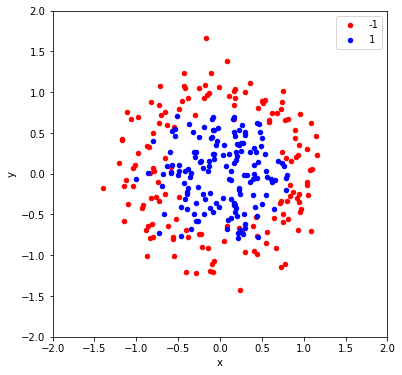

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accept X and return the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


----------
1 Weak estimators:
training accuracy:  0.51
test accuracy:  0.48
Number Of Weak estimators eith error less than 0.5:  1
1
----------
----------
3 Weak estimators:
training accuracy:  0.545
test accuracy:  0.5
Number Of Weak estimators eith error less than 0.5:  3
3
----------
----------
10 Weak estimators:
training accuracy:  0.615
test accuracy:  0.53
Number Of Weak estimators eith error less than 0.5:  10
10
----------
----------
50 Weak estimators:
training accuracy:  0.715
test accuracy:  0.69
Number Of Weak estimators eith error less than 0.5:  24
50
----------
----------
100 Weak estimators:
training accuracy:  0.715
test accuracy:  0.69
Number Of Weak estimators eith error less than 0.5:  24
100
----------
----------
1000 Weak estimators:
training accuracy:  0.715
test accuracy:  0.69
Number Of Weak estimators eith error less than 0.5:  24
1000
----------
----------
10000 Weak estimators:
training accuracy:  0.715
test accuracy:  0.69
Number Of Weak estimators eith er

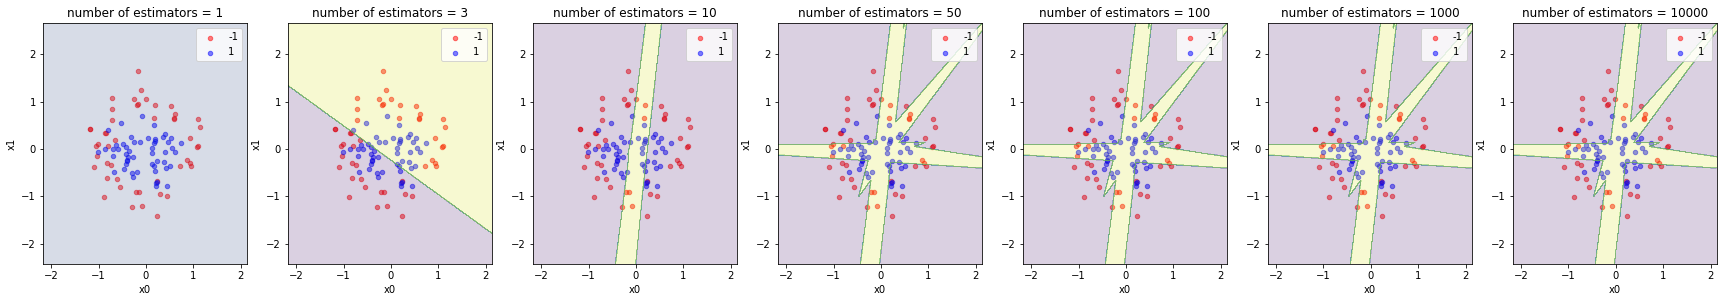

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Best score: 0.675
Best parameters set:
	n_estimators: 20
All Test Results (Mean Score, STD score):
0.500 (+/-0.084) for {'n_estimators': 1}
0.520 (+/-0.107) for {'n_estimators': 2}
0.575 (+/-0.184) for {'n_estimators': 3}
0.545 (+/-0.066) for {'n_estimators': 4}
0.580 (+/-0.183) for {'n_estimators': 5}
0.565 (+/-0.220) for {'n_estimators': 6}
0.590 (+/-0.189) for {'n_estimators': 7}
0.615 (+/-0.181) for {'n_estimators': 8}
0.570 (+/-0.097) for {'n_estimators': 9}
0.640 (+/-0.169) for {'n_estimators': 10}
0.650 (+/-0.167) for {'n_estimators': 11}
0.640 (+/-0.194) for {'n_estimators': 12}
0.640 (+/-0.175) for {'n_estimators': 13}
0.665 (+/-0.160) for {'n_estimators': 14}
0.635 (+/-0.108) for {'n_estimators': 15}
0.640 (+/-0.121) for {'n_estimators': 16}
0.660 (+/-0.150) for {'n_estimators': 17}
0.665 (+/-0.144) for {'n_estimators': 18}
0.660 (+/-0.150) for {'n_estimators': 19}
0.675 (+/-0.200) for {'n_estimators': 20}
0.655 (+/-0.159) for {'n_estimators': 21}
0.665 (+/-0.191) for {'n_est

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def do_task_n_classifier(n,ax):
  # Train ensemble classifiers
  clf = AdaBoostClassifier(n_estimators=n, base_estimator=LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000),algorithm='SAMME')
  clf.fit(X_train, y_train)
  #  plot the final decision plane of each ensemble model
  plot_data(X_test, y_test, clf.predict, ax)
  print("-"*10)
  print(str(n) + " Weak estimators:")
  print("training accuracy: ",accuracy_score(y_train,clf.predict(X_train)))
  print("test accuracy: ",accuracy_score(y_test,clf.predict(X_test)))
  print("Number Of Weak estimators eith error less than 0.5: ",len(np.argwhere(clf.estimator_errors_ < 0.5)))
  print(len(clf.estimator_errors_))
  #print(str(clf.estimator_errors_))
  #print(str(clf.estimator_weights_))
  print("-"*10)
    
  
n_list = [1,3,10,50,100,1000,10000]

# Split the sample set into 2/3rd train and 1/3 test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3))
fig = plt.figure(figsize=(30,30))
# Do Task
for i in range(len(n_list)):
  ax = fig.add_subplot(1,len(n_list),i+1)
  plt.title("number of estimators = " + str(n_list[i]))
  do_task_n_classifier(n_list[i],ax)
plt.show()
# # Calc 
tuned_parameters = {'n_estimators':range(1,50)}
grid_cv = GridSearchCV(AdaBoostClassifier(n_estimators=n, base_estimator=LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000),algorithm='SAMME'), tuned_parameters)
grid_cv.fit(X_train, y_train)
print("Best score: %0.3f" % grid_cv.best_score_)
print("Best parameters set:")
best_parameters = grid_cv.best_estimator_.get_params()
for param_name in sorted(tuned_parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))
means = grid_cv.cv_results_['mean_test_score']
stds = grid_cv.cv_results_['std_test_score']
print("All Test Results (Mean Score, STD score):")
for mean, std, params in zip(means, stds, grid_cv.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Your answers here

1. we know that in boosting the error rate decrease exponentially for each iteration (adding new weak learner) until we reach a stoping criteria.
we can see that the accuracy of the model is growing until a reaching a specific number of estimators and than it stops improving.

2. boosting is quite robust to overfitting, AdaBoost is simply a linear combination of classifiers which themselves can suffer from this problems but we keep them weak (general) in order to prevent it as much as possible.
we can use k-fold cross validation on the hyper parameter n to find the point.

3. for this task we can use estimator_errors_ attribute that holds the error of each weak learner, if the error is equal or greater than 0.5 their guess is worst than random so the weight that it will get when voting will be 0 as we observe this attribute we can count the number of estimators that have error lower than 0.5, if the number of those estimators we counted is less than n, then this is the optimal number of estimators